In [ ]:
import pandas as pd

df = pd.read_csv("customer_churn_dataset-training-master.csv")
print(df.head())  # visualizar as 5 primeiras linhas
df.describe()

   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4              20.0    1.

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [ ]:
print("Formato do dataset:", df.shape)

Formato do dataset: (440833, 12)


In [ ]:
print("Valores faltantes por coluna:")
print(df.isnull().sum())

Valores faltantes por coluna:
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [ ]:
print("Valores inválidos em 'Subscription Type':")
print(df[df['Subscription Type'].str.strip() == ""])
df = df.dropna()
df = df["Age"].fillna(df['Age'].mean())

Valores inválidos em 'Subscription Type':
Empty DataFrame
Columns: [CustomerID, Age, Gender, Tenure, Usage Frequency, Support Calls, Payment Delay, Subscription Type, Contract Length, Total Spend, Last Interaction, Churn]
Index: []


In [ ]:
print("Média de idade dos clientes:", df["Age"].mean())
print("Mediana da idade dos clientes:", df["Age"].median())
print("Desvio padrão:", df["Age"].std())


Média de idade dos clientes: 39.37315349157956
Mediana da idade dos clientes: 39.0
Desvio padrão: 12.442369490866385


In [ ]:
print(df["Churn"].value_counts())


Churn
1.0    249999
0.0    190833
Name: count, dtype: int64


In [ ]:
def faixa_etaria(tempo):
    if tempo <= 25:
        return "Jovem"
    elif tempo <= 36:
        return "Adulto"
    else:
        return "Idoso"

df["FaixaIdade"] = df["Age"].apply(faixa_etaria)
print(df["FaixaIdade"].value_counts())


FaixaIdade
Idoso     252010
Adulto    115139
Jovem      73683
Name: count, dtype: int64


In [ ]:
print(df.groupby("FaixaIdade")["Churn"].value_counts(normalize=True))

FaixaIdade  Churn
Adulto      0.0      0.511321
            1.0      0.488679
Idoso       1.0      0.603774
            0.0      0.396226
Jovem       1.0      0.564255
            0.0      0.435745
Name: proportion, dtype: float64


In [ ]:
print(df[["Age", "Churn", "Usage Frequency"]].corr())


                      Age     Churn  Usage Frequency
Age              1.000000  0.218394        -0.007190
Churn            0.218394  1.000000        -0.046101
Usage Frequency -0.007190 -0.046101         1.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid")


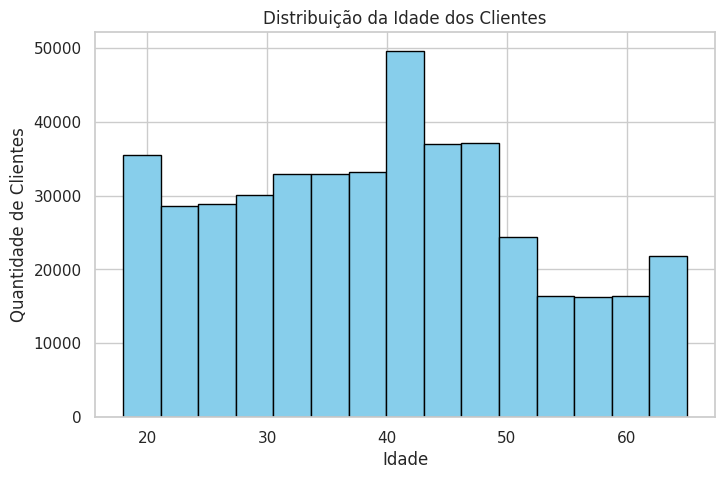

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df["Age"], bins=15, color="skyblue", edgecolor="black")
plt.title("Distribuição da Idade dos Clientes")
plt.xlabel("Idade")
plt.ylabel("Quantidade de Clientes")
plt.show()


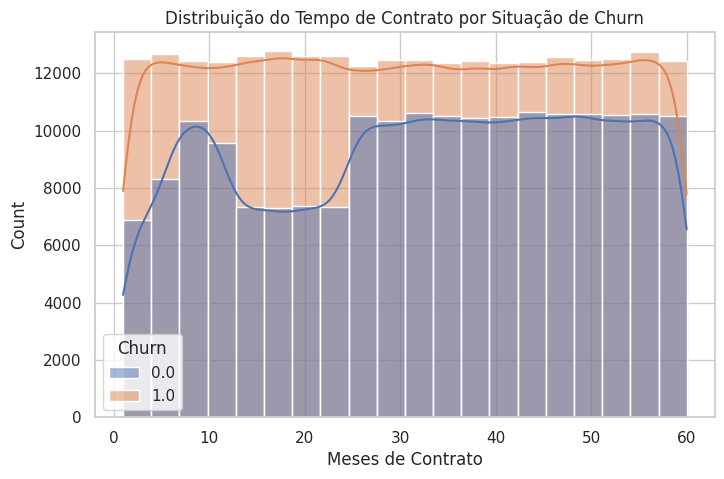

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Tenure", hue="Churn", kde=True, bins=20)
plt.title("Distribuição do Tempo de Contrato por Situação de Churn")
plt.xlabel("Meses de Contrato")
plt.show()


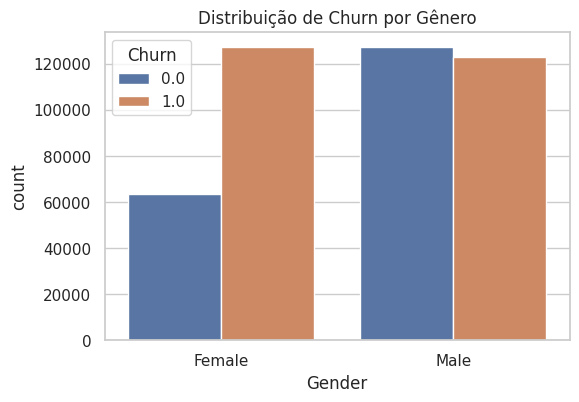

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Gender", hue="Churn")
plt.title("Distribuição de Churn por Gênero")
plt.show()


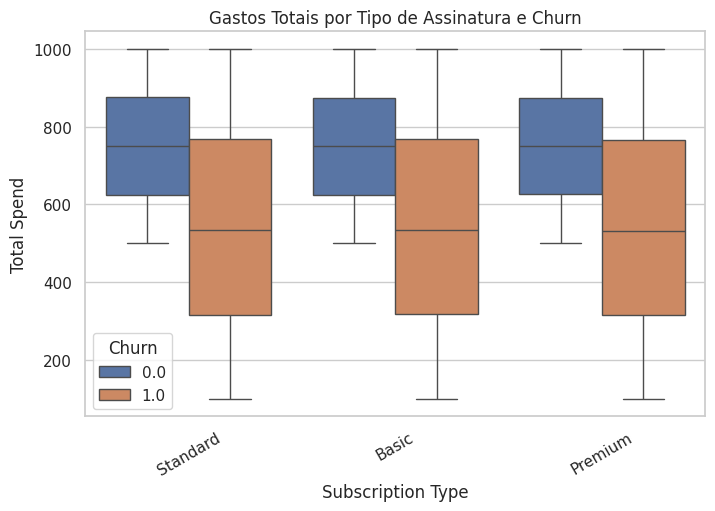

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Subscription Type", y="Total Spend", hue="Churn")
plt.title("Gastos Totais por Tipo de Assinatura e Churn")
plt.xticks(rotation=30)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


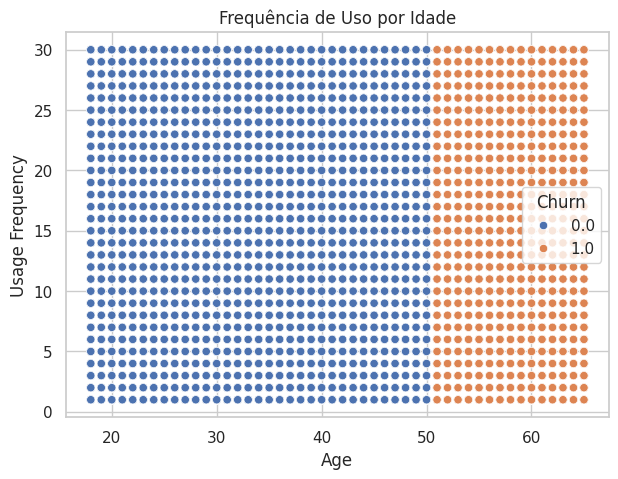

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="Age", y="Usage Frequency", hue="Churn")
plt.title("Frequência de Uso por Idade")
plt.show()


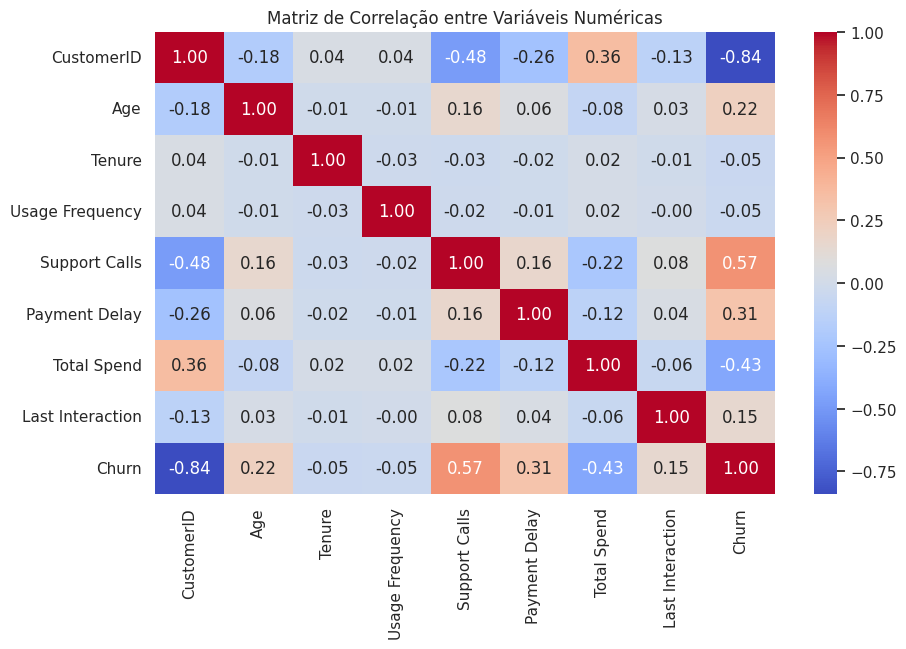

In [ ]:
plt.figure(figsize=(10, 6))
numericas = df.select_dtypes(include=["int64", "float64"])
corr = numericas.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()


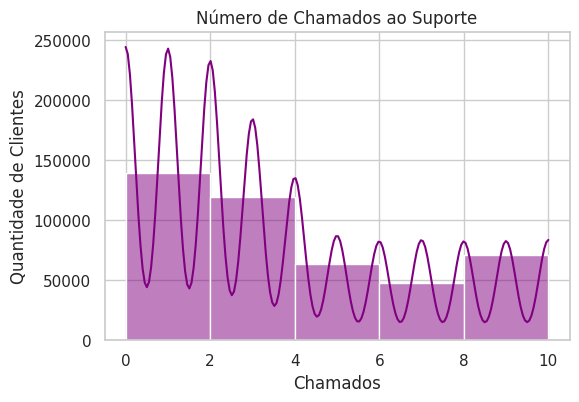

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Support Calls"], bins=5, kde=True, color="purple")
plt.title("Número de Chamados ao Suporte")
plt.xlabel("Chamados")
plt.ylabel("Quantidade de Clientes")
plt.show()


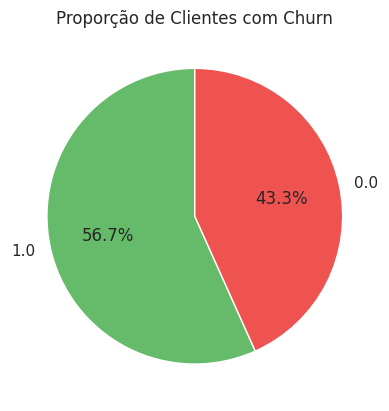

In [ ]:
df["Churn"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=["#66bb6a", "#ef5350"])
plt.title("Proporção de Clientes com Churn")
plt.ylabel("")
plt.show()
